In [150]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
warnings.filterwarnings("ignore")

In [151]:
df=pd.read_csv('E:\Work_DatPT\Study\stock-price-prediction\MBB.csv')
df=pd.DataFrame(df).dropna()
# df["Vol"] = df["Vol."].str.replace("M", "").astype(float) * 1e6
df["Vol_M"] = df["Vol."].str.replace("M", "").astype(float)
df = df.drop("Vol.",axis=1)
# Làm tròn giá
df["Price"] = df["Price"].str.replace(",", "").astype(float).round(-1).astype(int)
df["Open"] = df["Open"].str.replace(",", "").astype(float).round(-1).astype(int)
df["High"] = df["High"].str.replace(",", "").astype(float).round(-1).astype(int)
df["Low"] = df["Low"].str.replace(",", "").astype(float).round(-1).astype(int)
df["Change"] = df["Change %"].str.replace("%", "").astype(float) / 100
df = df.drop('Change %', axis=1)
# Chuyển đổi cột Date sang định dạng datetime
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
# Tính đường MA20 MA50
df = df.reindex(index=df.index[::-1])
df["MA20"] = df["Price"].rolling(window=20, min_periods=1).mean().round(-1).astype(int)  # Trung bình động 20 ngày
df["MA50"] = df["Price"].rolling(window=50,min_periods=1).mean().round(-1).astype(int)
df["VolMA20"] = df["Vol_M"].rolling(window=20,min_periods=1).mean().round(2)
df = df.reindex(index=df.index[::-1])


df.head(200)

,Date,Price,Open,High,Low,Vol_M,Change,MA20,MA50,VolMA20
0,2024-11-27,24000,23800,24500,23800,1.21,-0.0041,24140,24850,10.84
1,2024-11-26,24100,24800,25000,24000,4.44,0.0063,24190,24860,11.50
2,2024-11-25,23950,24000,24050,23900,5.17,-0.0021,24230,24860,11.71
3,2024-11-22,24000,23950,24200,23900,9.21,0.0000,24280,24860,11.65
4,2024-11-21,24000,23600,24000,23400,6.58,0.0191,24310,24860,11.73
...,...,...,...,...,...,...,...,...,...,...
196,2024-02-19,23430,23480,23580,23090,20.95,-0.0021,21910,19900,19.02
197,2024-02-16,23480,23580,23580,23190,16.17,-0.0062,21790,19780,19.23
198,2024-02-15,23630,23190,23680,23040,24.09,0.0277,21660,19660,20.72
199,2024-02-07,22990,22600,23190,22600,21.18,0.0195,21490,19530,20.75


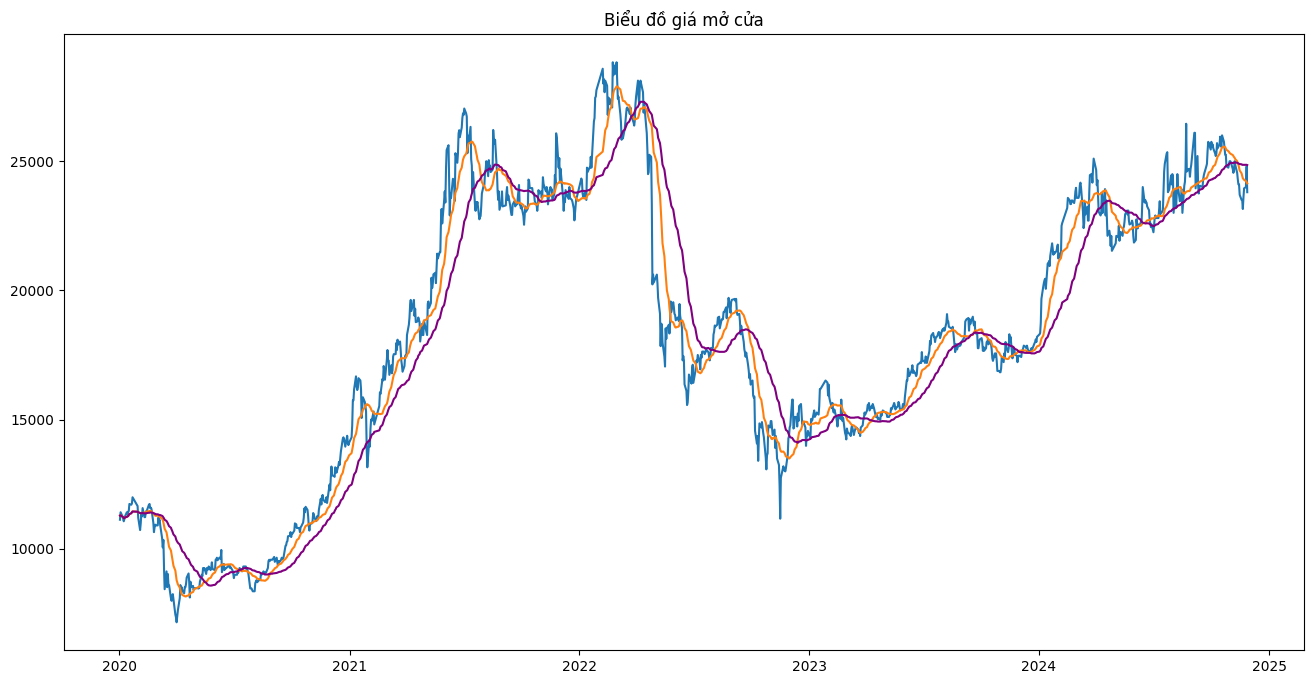

In [152]:

plt.figure(figsize=(16,8))
plt.title('Biểu đồ giá mở cửa')
# plt.plot(df['Price'])
plt.plot(df["Date"], df["Open"])
plt.plot(df["Date"],df["MA20"], label = "MA20")
plt.plot(df["Date"],df["MA50"],color = "purple", label = "MA50")
plt.show()

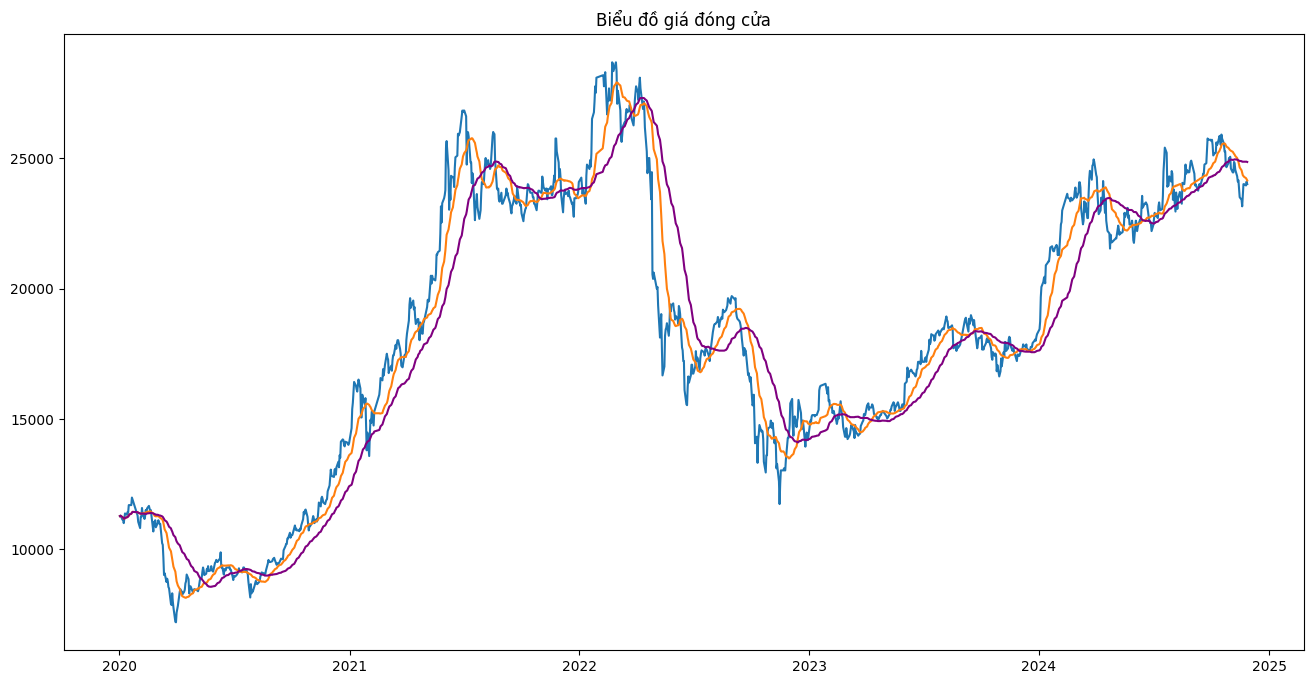

In [153]:
plt.figure(figsize=(16,8))
plt.title('Biểu đồ giá đóng cửa')
# plt.plot(df['Price'])
plt.plot(df["Date"], df["Price"], label="Price")
plt.plot(df["Date"],df["MA20"], label = "MA20")
plt.plot(df["Date"],df["MA50"],color = "purple", label = "MA50")
plt.show()

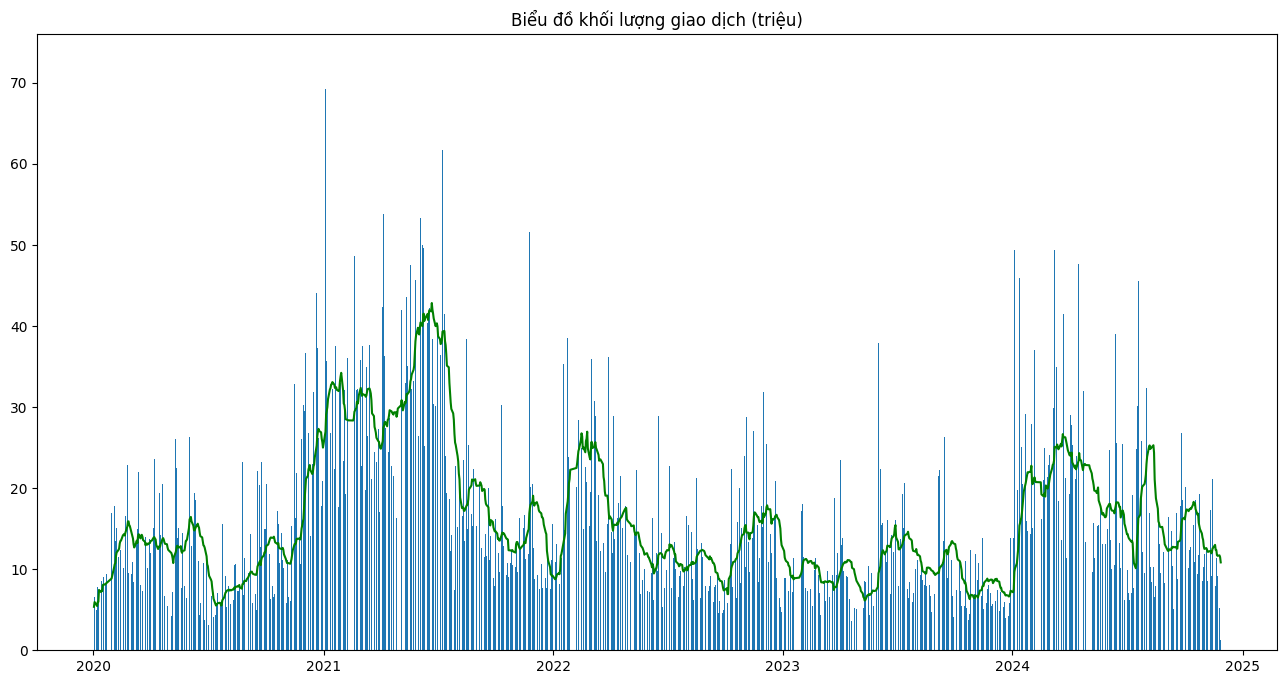

In [154]:
plt.figure(figsize=(16,8))
plt.title('Biểu đồ khối lượng giao dịch (triệu)')
# plt.plot(df['Price'])
plt.bar(df["Date"], df["Vol_M"], label="Vol")
plt.plot(df["Date"],df["VolMA20"],color = "green", label = "VolMA20")
plt.show()

## MACHINE LEARNING RANDOM FOREST REGRESSOR

Hai hàm mean_absolute_error (MAE) và mean_squared_error (RMSE) được sử dụng để đánh giá độ chính xác của mô hình học máy

In [155]:
# Đặc trưng đầu vào (X) và mục tiêu (y)
X = df[["Vol_M","Open","High","Low","MA20","MA50","VolMA20","Change"]]
y = df["Price"]

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 111.63518984915073
Root Mean Squared Error (RMSE): 174.36078582716522


1. Mean Absolute Error (MAE): 111.64
Ý nghĩa:
Sai số trung bình giữa giá trị thực và giá trị dự đoán là khoảng 111.64 đơn vị.
So với mức giá trung bình của cổ phiếu trong dữ liệu (dao động từ 20,000 đến 25,000), mức sai số này khá nhỏ (chỉ khoảng 0.5% so với giá trung bình).
Đây là một kết quả tích cực, cho thấy mô hình có khả năng dự đoán chính xác ở mức độ tốt.
2. Root Mean Squared Error (RMSE): 174.36
Ý nghĩa:
RMSE nhấn mạnh vào các lỗi lớn hơn. Giá trị 174.36 cho thấy sai số lớn nhất giữa các giá trị thực và dự đoán đã giảm đáng kể so với mô hình trước đó (217.53).
RMSE nhỏ hơn 1% so với giá trị cổ phiếu, điều này cũng là một dấu hiệu tốt cho tính ổn định của mô hình.

## đánh giá mô hình trong x ngày gần nhất

Đường xanh lá cây là đường dự đoán giá, Đường màu lam là đường giá chính xác


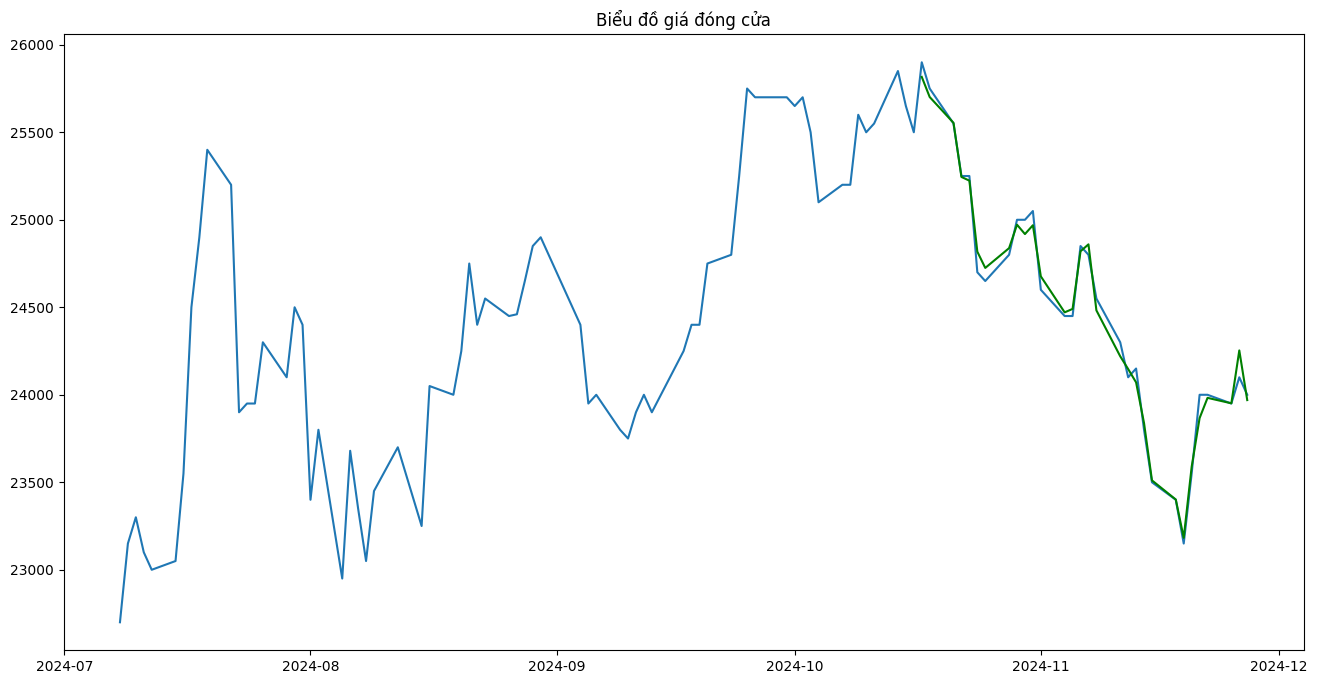

In [156]:
#Số ngày gần nhất
num_days = 30

data_test =  df[["Vol_M","Open","High","Low","MA20","MA50","VolMA20","Change"]].head(num_days)
predicted = model.predict(data_test)
print("Đường xanh lá cây là đường dự đoán giá, Đường màu lam là đường giá chính xác")

plt.figure(figsize=(16,8))
plt.title('Biểu đồ giá đóng cửa')
# plt.plot(df['Price'])
df_predict = df.head(100)
plt.plot(df_predict["Date"], df_predict["Price"], label="Price")
plt.plot(df_predict["Date"].head(num_days), predicted,color ="green", label="Price")
plt.show()


## Dự đoán giá cổ phiếu trong 10 ngày tới với các dữ liệu được giả lập random

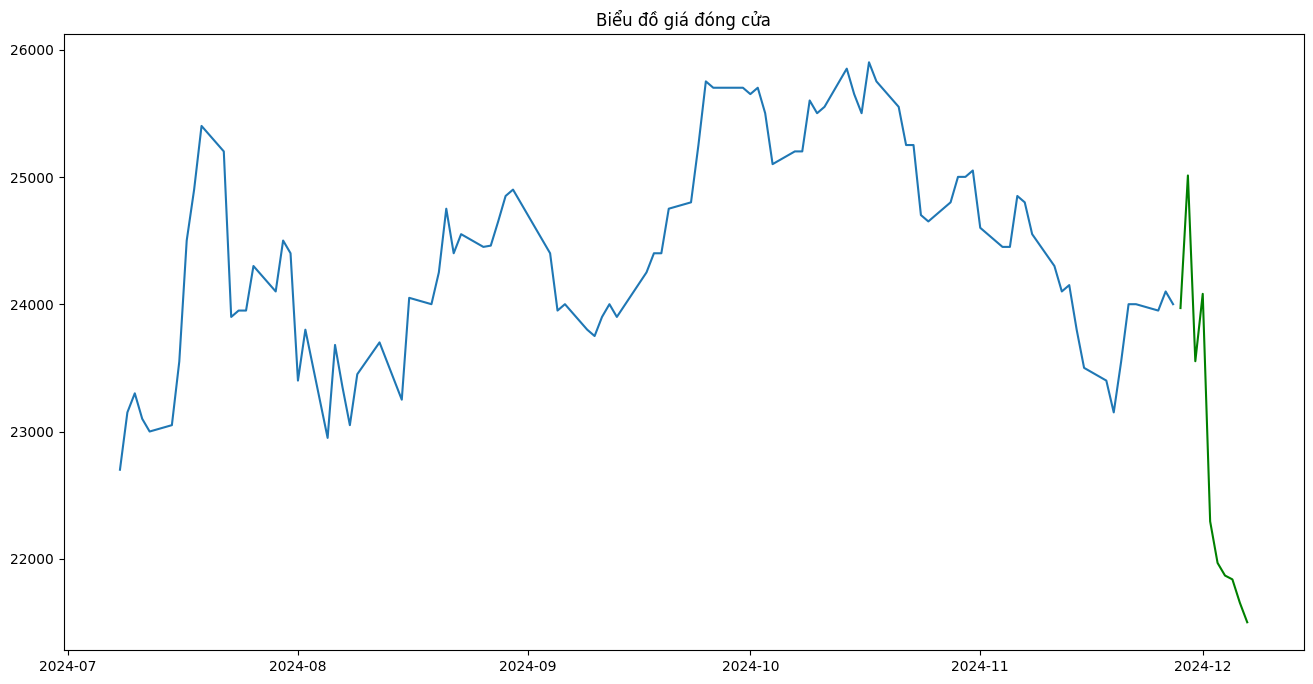

In [160]:

# Dự đoán giá cho 10 ngày tiếp theo
predictions = []
dates = []  # Danh sách ngày dự đoán
features = []  # Danh sách các đặc trưng dự đoán
last_day_data = X.head(1)  # Dữ liệu của ngày cuối cùng (2024-11-27)
last_date = df['Date'].iloc[0]  # Ngày cuối cùng từ dữ liệu

for i in range(10):
    # Dự đoán giá cho ngày tiếp theo
    predicted_price = model.predict(last_day_data)  # Dự đoán cho dòng cuối cùng
    predictions.append(predicted_price[0])

    # Tạo ngày tiếp theo
    next_date = last_date + pd.Timedelta(days=i+1)  # Ngày tiếp theo
    dates.append(next_date)

    # Lưu trữ các đặc trưng của ngày dự đoán
    features.append(last_day_data.iloc[0].to_dict())

    # Cập nhật dữ liệu cho ngày tiếp theo
    next_day_data = last_day_data.copy()

    # Giả sử "Open", "High", "Low", "MA20", "MA50", "VolMA20" có sự thay đổi nhẹ từ ngày trước đó
    next_day_data["Open"] += np.random.uniform(-1000, 1000)
    next_day_data["Vol_M"] += np.random.uniform(-0.5, 5)
    next_day_data["High"] += np.random.uniform(-1000, 1000)
    next_day_data["Low"] += np.random.uniform(-1000, 1000)
    next_day_data["MA20"] += np.random.uniform(-20, 20)
    next_day_data["MA50"] += np.random.uniform(-20, 20)
    next_day_data["VolMA20"] += np.random.uniform(-1, 1)
    next_day_data["Change"] = np.random.uniform(-7, 2)  # Thay đổi nhẹ mỗi ngày

    # Cập nhật lại đặc trưng X
    last_day_data = next_day_data

# Tạo DataFrame kết quả với các ngày, đặc trưng và giá dự đoán
result_df = pd.DataFrame(features)
result_df["Date"] = dates
result_df["Predicted_Price"] = predictions

# In kết quả
plt.figure(figsize=(16,8))
plt.title('Biểu đồ giá đóng cửa')
# plt.plot(df['Price'])
df_predict = df.head(100)
plt.plot(df_predict["Date"], df_predict["Price"], label="Price")
plt.plot(result_df["Date"], result_df["Predicted_Price"],color ="green", label="Price")
plt.show()

In [159]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # Tạo dữ liệu giả lập (hoặc sử dụng dữ liệu của bạn)
# np.random.seed(42)
# n_samples = 100

# # Giả lập dữ liệu
# data = {
#     "Vol_M": np.random.rand(n_samples) * 1000000,  
#     "Open": np.random.rand(n_samples) * 50000 + 20000,  
#     "High": np.random.rand(n_samples) * 50000 + 25000,  
#     "Low": np.random.rand(n_samples) * 50000 + 15000,  
#     "MA20": np.random.rand(n_samples) * 50000 + 20000,  
#     "MA50": np.random.rand(n_samples) * 50000 + 20000,  
#     "VolMA20": np.random.rand(n_samples) * 1000000,  
#     "Change": np.random.rand(n_samples) * 5 - 2,  
# }

# # Chuyển thành DataFrame
# df = pd.DataFrame(data)

# # Tạo giá cổ phiếu (Price)
# df['Price'] = (df['Open'] + df['High'] + df['Low']) / 3 + np.random.rand(n_samples) * 5000  

# # Chuẩn hóa dữ liệu giá cổ phiếu
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(df[['Price']].values)

# # Tạo dữ liệu huấn luyện và kiểm tra
# train_size = int(len(scaled_data) * 0.8)
# train_data = scaled_data[:train_size]
# test_data = scaled_data[train_size:]

# # Tạo các chuỗi dữ liệu đầu vào (X) và đầu ra (y)
# def create_dataset(data, time_step=1):
#     X, y = [], []
#     for i in range(len(data) - time_step - 1):
#         X.append(data[i:(i + time_step), 0])
#         y.append(data[i + time_step, 0])
#     return np.array(X), np.array(y)

# time_step = 10
# X_train, y_train = create_dataset(train_data, time_step)
# X_test, y_test = create_dataset(test_data, time_step)

# # Reshape dữ liệu thành dạng phù hợp với LSTM
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# # Xây dựng mô hình LSTM
# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# model.add(LSTM(units=50, return_sequences=False))
# model.add(Dense(units=1))  # Dự đoán giá cổ phiếu

# # Biên dịch và huấn luyện mô hình
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# # Dự đoán giá cổ phiếu
# predicted_prices = model.predict(X_test)

# # Chuyển giá trị dự đoán về giá trị gốc (ngược lại chuẩn hóa)
# predicted_prices = scaler.inverse_transform(predicted_prices)
# y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# # Vẽ biểu đồ kết quả
# plt.figure(figsize=(10, 6))
# plt.plot(y_test, label='Actual Price', color='blue')
# plt.plot(predicted_prices, label='Predicted Price', color='red')
# plt.title('Stock Price Prediction using LSTM')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
# plt.show()
